In [3]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
def save_model(obj,path_to_save):
    with open(path_to_save, 'wb') as f:
        pickle.dump(obj, f)
    return True

def load_model(path_to_model):
    with open(path_to_model,'rb') as f:
        return pickle.load(f)

In [5]:
df = pd.read_csv('../datasets/heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

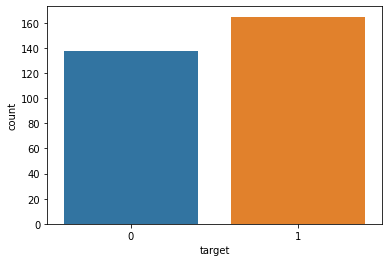

In [8]:
sns.countplot(x='target',data=df)
plt.show()

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
x_cols = df.columns.tolist()[:-1]
x = df[x_cols]
y = df['target']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)

In [13]:
from sklearn.naive_bayes import GaussianNB

In [15]:
GaussianNB?

Init signature: GaussianNB(*, priors=None, var_smoothing=1e-09)
Docstring:     
Gaussian Naive Bayes (GaussianNB)

Can perform online updates to model parameters via :meth:`partial_fit`.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like of shape (n_classes,)
    Prior probabilities of the classes. If specified the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

    .. versionadded:: 0.20

Attributes
----------
class_count_ : ndarray of shape (n_classes,)
    number of training samples observed in each class.

class_prior_ : ndarray of shape (n_classes,)
    probability

In [14]:
clf = GaussianNB()

In [16]:
clf.fit(xtrain,ytrain)

GaussianNB()

In [18]:
ypred = clf.predict(xtest)

In [19]:
print(confusion_matrix(ypred,ytest))

[[28  0]
 [ 4 29]]


In [20]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.88      0.94        33

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

